In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import seaborn
from ipywidgets import widgets, interact
from IPython.display import display, Image as IPImage
import shutil



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
import shutil

# Specify the base path where folders will be created
output_base_path = "/content/drive/MyDrive/Colab Notebooks"

# Lists to store data
labels = []
img_names = []
img_paths = []
gender = []

# Original dataset path
dataset_path = os.path.join(output_base_path, 'dataset')

# Iterate through each file in the dataset
for file in os.listdir(dataset_path):
    if file.endswith('.txt'):
        # Read content from the text file
        with open(os.path.join(dataset_path, file), 'r') as t:
            content = t.readlines()

            # Extract information
            current_label = content[1].rsplit(' ')[1][0]
            current_gender = content[0].rsplit(' ')[1][0]
            img_name = content[2].rsplit(' ')[1][:-4] + '.png'
            img_path = os.path.join(dataset_path, img_name)

            # Append data to lists
            labels.append(current_label)
            img_names.append(img_name)
            img_paths.append(img_path)
            gender.append(current_gender)

            # Create folders for each label if not already exists
            label_folder_path = os.path.join(output_base_path, current_label)
            os.makedirs(label_folder_path, exist_ok=True)

            # Move the image to the corresponding folder
            shutil.move(img_path, label_folder_path)

print("Labels:", labels)
print("Image Names:", img_names)
print("Image Paths:", img_paths)
print("Gender:", gender)


Labels: ['T', 'W', 'L', 'A', 'L', 'W', 'T', 'W', 'W', 'R', 'W', 'W', 'L', 'W', 'W', 'R', 'T', 'T', 'L', 'L', 'W', 'T', 'R', 'R', 'W', 'R', 'A', 'W', 'A', 'L', 'T', 'W', 'L', 'R', 'A', 'A', 'T', 'R', 'T', 'R', 'L', 'T', 'L', 'R', 'A', 'W', 'A', 'W', 'T', 'R', 'R', 'A', 'A', 'L', 'R', 'A', 'R', 'L', 'R', 'L', 'R', 'R', 'T', 'A', 'L', 'L', 'T', 'W', 'A', 'T', 'A', 'L', 'W', 'L', 'A', 'R', 'W', 'T', 'A', 'R', 'T', 'L', 'L', 'T', 'T', 'L', 'L', 'T', 'A', 'T', 'R', 'R', 'L', 'T', 'T', 'L', 'A', 'T', 'W', 'A', 'R', 'W', 'R', 'T', 'L', 'R', 'L', 'R', 'R', 'L', 'W', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'T', 'T', 'W', 'R', 'R', 'R', 'L', 'L', 'L', 'T', 'A', 'R', 'L', 'R', 'L', 'W', 'R', 'L', 'W', 'T', 'W', 'W', 'T', 'R', 'L', 'A', 'W', 'L', 'R', 'R', 'T', 'A', 'A', 'W', 'A', 'W', 'A', 'W', 'T', 'W', 'W', 'R', 'A', 'L', 'W', 'R', 'A', 'R', 'T', 'A', 'R', 'L', 'W', 'A', 'R', 'A', 'R', 'L', 'T', 'T', 'A', 'T', 'T', 'W', 'L', 'L', 'A', 'L', 'W', 'L', 'A', 'W', 'L', 'T', 'R', 'R', 'T', 'T', 'A', '

In [ ]:
df = pd.DataFrame()
df['IMAGE PATH'] = img_paths
df['IMAGE NAME'] = img_names
df['LABEL'] = labels
df['GENDER'] = gender

In [ ]:
df.head(100)


,IMAGE PATH,IMAGE NAME,LABEL,GENDER
0,/content/drive/MyDrive/Colab Notebooks/dataset...,s1433_07.png,T,M
1,/content/drive/MyDrive/Colab Notebooks/dataset...,s1462_09.png,W,F
2,/content/drive/MyDrive/Colab Notebooks/dataset...,s1418_10.png,L,M
3,/content/drive/MyDrive/Colab Notebooks/dataset...,s1458_04.png,A,F
4,/content/drive/MyDrive/Colab Notebooks/dataset...,f1504_10.png,L,M
...,...,...,...,...
95,/content/drive/MyDrive/Colab Notebooks/dataset...,f1535_08.png,L,M
96,/content/drive/MyDrive/Colab Notebooks/dataset...,f1534_05.png,A,F
97,/content/drive/MyDrive/Colab Notebooks/dataset...,f1558_07.png,T,M
98,/content/drive/MyDrive/Colab Notebooks/dataset...,f1548_06.png,W,M


<Axes: xlabel='LABEL', ylabel='count'>

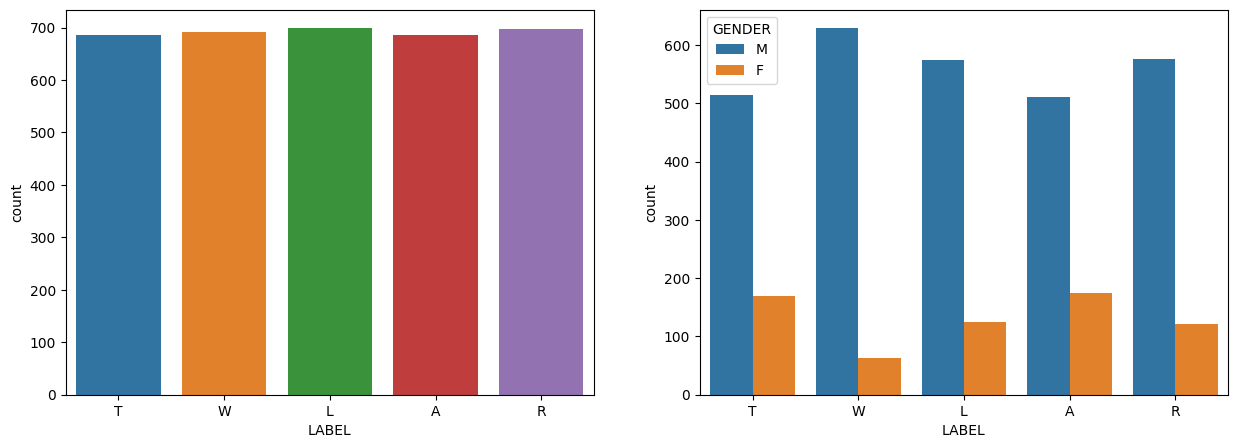

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], data = df, x = 'LABEL')
sns.countplot(ax=axes[1], data = df, x = 'LABEL', hue = 'GENDER')

In [ ]:
df['LABEL'].value_counts()
df.drop(columns = 'GENDER',inplace=True)
df.head()

,IMAGE PATH,IMAGE NAME,LABEL
0,/content/drive/MyDrive/Colab Notebooks/dataset...,s1433_07.png,T
1,/content/drive/MyDrive/Colab Notebooks/dataset...,s1462_09.png,W
2,/content/drive/MyDrive/Colab Notebooks/dataset...,s1418_10.png,L
3,/content/drive/MyDrive/Colab Notebooks/dataset...,s1458_04.png,A
4,/content/drive/MyDrive/Colab Notebooks/dataset...,f1504_10.png,L


In [ ]:
classes = list(np.unique(labels))
print(classes)
map_classes = dict(zip(classes, [t for t in range(len(classes))]))
print(map_classes)
df['MAPPED LABELS'] = [map_classes[i] for i in df['LABEL']]
df = df.sample(frac = 1)
df.to_csv('dataset.csv')
df.head()

['A', 'L', 'R', 'T', 'W']
{'A': 0, 'L': 1, 'R': 2, 'T': 3, 'W': 4}


,IMAGE PATH,IMAGE NAME,LABEL,MAPPED LABELS
1539,/content/drive/MyDrive/Colab Notebooks/dataset...,f0754_04.png,R,2
925,/content/drive/MyDrive/Colab Notebooks/dataset...,s1313_03.png,R,2
578,/content/drive/MyDrive/Colab Notebooks/dataset...,f1324_08.png,L,1
1707,/content/drive/MyDrive/Colab Notebooks/dataset...,f0846_06.png,W,4
2308,/content/drive/MyDrive/Colab Notebooks/dataset...,s0501_06.png,W,4


In [ ]:
df['MAPPED LABELS'] = [map_classes[i] for i in df['LABEL']]
df = df.sample(frac = 1)
df.to_csv('dataset1.csv')
df.head()

,IMAGE PATH,IMAGE NAME,LABEL,MAPPED LABELS
884,/content/drive/MyDrive/Colab Notebooks/dataset...,s1408_03.png,R,2
1336,/content/drive/MyDrive/Colab Notebooks/dataset...,s1167_07.png,A,0
2771,/content/drive/MyDrive/Colab Notebooks/dataset...,f0476_09.png,L,1
11,/content/drive/MyDrive/Colab Notebooks/dataset...,s1459_09.png,W,4
3132,/content/drive/MyDrive/Colab Notebooks/dataset...,f0053_04.png,T,3


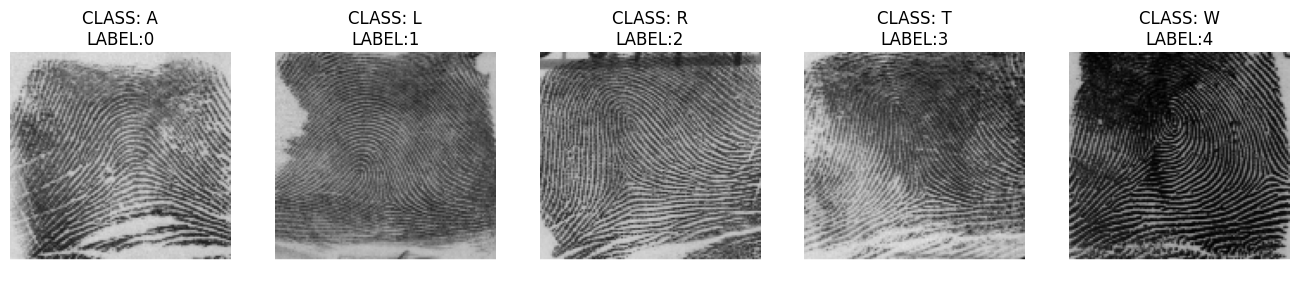

In [ ]:
dim = len(classes)
fig,axes = plt.subplots(1,dim)
fig.subplots_adjust(0,0,2,2)
for idx, i in enumerate(classes):
    dum = df[df['LABEL'] == i]
    random_num = random.choice(dum.index)
    label = df.loc[random_num]['LABEL']
    axes[idx].imshow(cv2.imread(df.loc[random_num]['IMAGE PATH']))
    axes[idx].set_title("CLASS: "+label +"\n" +  "LABEL:"+str(map_classes[label]))
    axes[idx].axis('off')

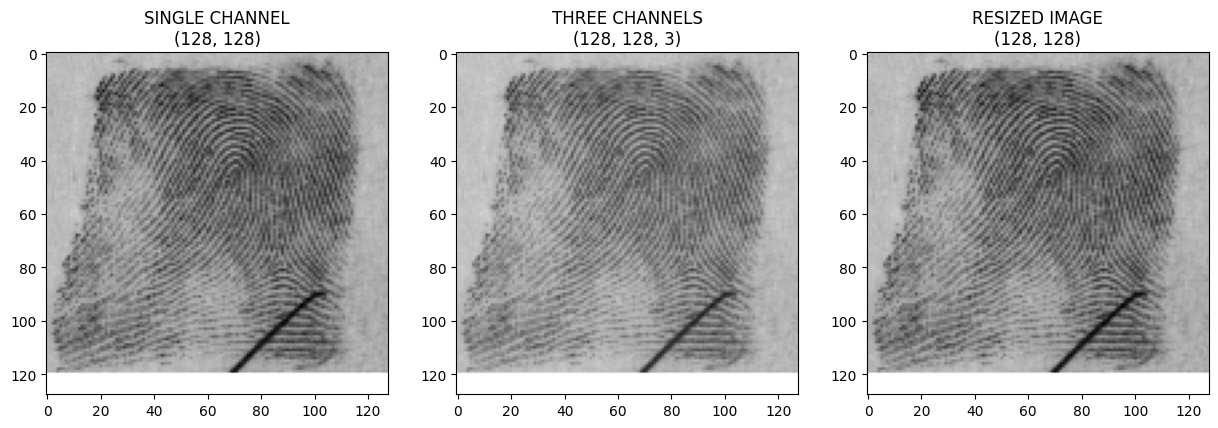

In [ ]:
random_number = random.randint(0,len(df))
img_path = df.loc[random_number]['IMAGE PATH']
gray_img = cv2.imread(img_path,0)
color_img = cv2.imread(img_path)
resized_img = cv2.resize(cv2.imread(img_path,0), (128,128)) #Resized Grayscale image

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('SINGLE CHANNEL\n'+ str(gray_img.shape))
axes[0].imshow(gray_img, cmap='gray')
axes[1].set_title('THREE CHANNELS\n'+ str(color_img.shape))
axes[1].imshow(color_img)
axes[2].set_title('RESIZED IMAGE\n'+ str(resized_img.shape))
axes[2].imshow(resized_img, cmap='gray')

In [ ]:
# Define image size
IMG_SIZE = 128

def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    # Normalize the image
    image = image / 255.0
    return image

# Preprocess all images
X = np.array([preprocess_image(path) for path in df['IMAGE PATH']])
y = np.array(df['MAPPED LABELS'])

# One-hot encode the labels
y = keras.utils.to_categorical(y, num_classes=len(classes))


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y)

# Ensure the data is in the correct shape for an ANN
X_train = X_train.reshape(-1, IMG_SIZE * IMG_SIZE)
X_test = X_test.reshape(-1, IMG_SIZE * IMG_SIZE)


In [ ]:
model = Sequential([
    Flatten(input_shape=(IMG_SIZE * IMG_SIZE,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.01)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2097280   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2105861 (8.03 MB)
Trainable params: 2105861 (8.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
102/102 [==============================] - 4s 31ms/step - loss: 2.2280 - accuracy: 0.2189 - val_loss: 1.7447 - val_accuracy: 0.3030
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

6/6 [==============================] - 0s 6ms/step - loss: 1.6300 - accuracy: 0.2717
Test accuracy: 0.27167630195617676


FileUpload(value={}, description='Upload Image')

Label(value='Fingerprint is for:')

Label(value='Predicted Label:')

Label(value='Accuracy:')

1/1 [==============================] - 0s 23ms/step


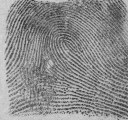

In [ ]:

# Placeholder value for the image name
img_name = None

# Assuming IMG_SIZE is defined elsewhere in your code
IMG_SIZE = 128

# Define the GUI components
upload_btn = widgets.FileUpload(description="Upload Image")
output_label = widgets.Label(value="Predicted Label:")
output_folder = widgets.Label(value="Fingerprint is for:")
output_acc = widgets.Label(value="Accuracy:")

# Display the GUI components
display(upload_btn, output_folder, output_label, output_acc)

# Define the function to preprocess the image and make a prediction
def process_and_predict(change):
    # Get the uploaded image
    img_name = list(upload_btn.value.values())[0]["content"]

    # Convert the image data to a NumPy array
    nparr = np.frombuffer(img_name, np.uint8)

    # Decode the image
    img = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

    # Preprocess the image
    processed_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    processed_img = processed_img.reshape(1, IMG_SIZE * IMG_SIZE)

    # Make a prediction
    prediction = model.predict(processed_img)

    # Get the predicted label
    predicted_label = classes[np.argmax(prediction)]

    # Set the image name based on the uploaded file

    # Get the corresponding folder name
    img_name_without_extension = os.path.splitext(img_name)[0]
    corresponding_folder = None

    folders_to_check = ["/content/drive/MyDrive/Colab Notebooks/Abdo", "/content/drive/MyDrive/Colab Notebooks/Lolo",
                        "/content/drive/MyDrive/Colab Notebooks/Rana", "/content/drive/MyDrive/Colab Notebooks/Tamer",
                        "/content/drive/MyDrive/Colab Notebooks/Wael"]

    for folder in folders_to_check:
        folder_path = os.path.join("/content/drive/MyDrive/Colab Notebooks", folder)
        if img_name_without_extension in os.listdir(folder_path):
            corresponding_folder = folder
            break

    # If no match is found, set a default folder
    if corresponding_folder is None:
        corresponding_folder = "unknown_folder"

    # Get the predicted accuracy
    predicted_accuracy = np.max(prediction)

    # Display the results
    output_label.value = f"Predicted Label: {predicted_label}"
    output_folder.value = f"Fingerprint is for: {corresponding_folder}"
    output_acc.value = f"Accuracy: {predicted_accuracy:.2%}"
    display(IPImage(data=img_name, format='png'))

# Attach the function to the upload button
upload_btn.observe(process_and_predict, names='_counter')
